In [65]:
import os
import itertools
import pandas as pd
import seaborn as sns
from matplotlib import cm
import scipy.stats as stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
BASE_DIR = os.getcwd()
file_path = '%s/../Data_EDA.csv'%BASE_DIR

In [3]:
df = pd.read_csv(file_path, encoding="latin-1")

In [7]:
df.head()

,POP_CODE,POP_NAME,ORDER_STATUS,DOC_DATE_YEAR,DOC_DATE_QUARTER_YR,DOC_DATE_MONTH_YR,DOC_DATE_DAYS_MNTH,DOC_DATE_WEEK_MNTH,DOC_DATE_WEEK_YR,TOWN_CODE,...,STREET_CODE,STREET_NAME,COMPANY_RANK,RANK,RURAL_CODE,RURAL_BOOL,CHANNEL_CODE,SUB_CHANNEL_CODE,ELEMENT_CODE,SUB_ELEMENT_CODE
0,9001001003,ALAM MEDICAL STORE,0,2014,1,2,28,4,8,9,...,322,K.E.S.C NATIONAL COLLEGE,3,5,1,Y,1,1,3,7
1,9001001003,ALAM MEDICAL STORE,0,2014,1,3,31,1,10,9,...,322,K.E.S.C NATIONAL COLLEGE,3,5,1,Y,1,1,3,7
2,9001001003,ALAM MEDICAL STORE,1,2014,1,3,31,2,11,9,...,322,K.E.S.C NATIONAL COLLEGE,3,5,1,Y,1,1,3,7
3,9001001003,ALAM MEDICAL STORE,1,2014,1,3,31,3,12,9,...,322,K.E.S.C NATIONAL COLLEGE,3,5,1,Y,1,1,3,7
4,9001001003,ALAM MEDICAL STORE,0,2014,1,3,31,4,13,9,...,322,K.E.S.C NATIONAL COLLEGE,3,5,1,Y,1,1,3,7


In [9]:
df.shape

(120659, 29)

In [10]:
for field in df.columns:
    print("{0:20} {1:10} {2}".format(field, str(df[field].dtype), df[field].nunique()))

POP_CODE             int64      820
POP_NAME             object     698
ORDER_STATUS         int64      2
DOC_DATE_YEAR        int64      5
DOC_DATE_QUARTER_YR  int64      4
DOC_DATE_MONTH_YR    int64      12
DOC_DATE_DAYS_MNTH   int64      4
DOC_DATE_WEEK_MNTH   int64      5
DOC_DATE_WEEK_YR     int64      53
TOWN_CODE            int64      5
TOWN_NAME            object     5
LOCALITY_CODE        int64      14
LOCALITY_NAME        object     14
SLOCALITY_CODE       int64      37
SLOCALITY_NAME       object     37
POS_TYPE_CODE        int64      15
POS_TYPE_NAME        object     15
MARKET_CODE          int64      738
MARKET_NAME          object     738
STREET_CODE          int64      292
STREET_NAME          object     292
COMPANY_RANK         int64      3
RANK                 int64      5
RURAL_CODE           int64      2
RURAL_BOOL           object     2
CHANNEL_CODE         int64      3
SUB_CHANNEL_CODE     int64      4
ELEMENT_CODE         int64      5
SUB_ELEMENT_CODE     int64  

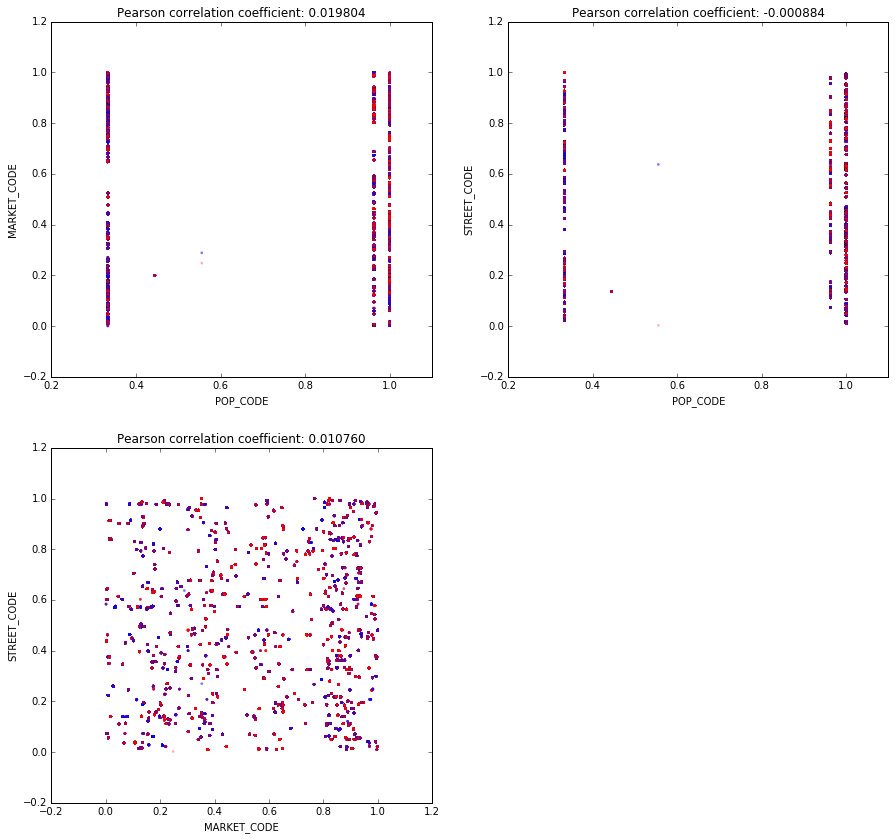

In [24]:
plt.figure(figsize=(15,14))
cont_features = ['POP_CODE', 'MARKET_CODE', 'STREET_CODE']
colors = df['ORDER_STATUS'].apply(lambda x: 'r' if x==1 else 'b')

for index, pair in enumerate(list(itertools.combinations(cont_features, 2))):

    plt.subplot(2, 2, index + 1)
    x = df[pair[0]]/max(df[pair[0]])
    y = df[pair[1]]/max(df[pair[1]])

    plt.scatter(x, y, c = colors, alpha = 0.3, lw = 0, s = 7)
    plt.title('Pearson correlation coefficient: %f'%(df[pair[0]].corr(df[pair[1]])))
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    
plt.show()

In [61]:
stats.kendalltau(df['RANK'], df['COMPANY_RANK'])[0]

-0.035057087059834173

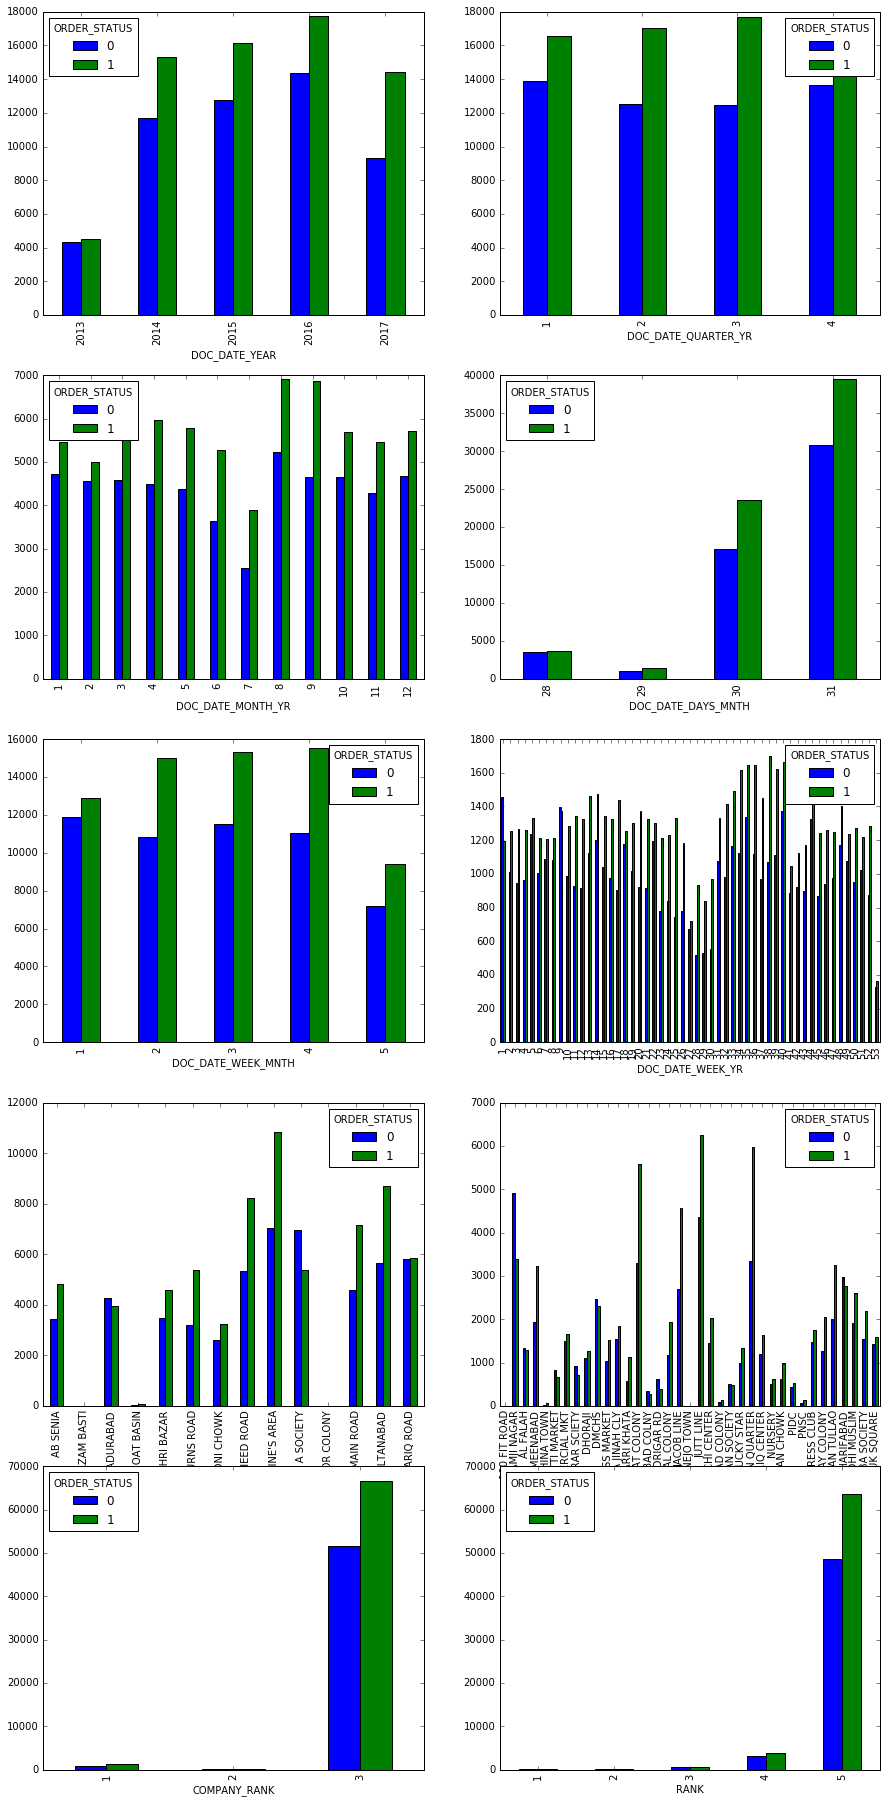

In [30]:
plt.figure(figsize=(15,31.5))

bar_features = ['DOC_DATE_YEAR', 'DOC_DATE_QUARTER_YR', 'DOC_DATE_MONTH_YR', 'DOC_DATE_DAYS_MNTH',
                    'DOC_DATE_WEEK_MNTH', 'DOC_DATE_WEEK_YR', 'LOCALITY_NAME', 'SLOCALITY_NAME',
                    'COMPANY_RANK', 'RANK']

for index, field in enumerate(bar_features):
    plt.subplot(5, 2, index+1)
    df_unstack = df.groupby([field, 'ORDER_STATUS'])[field].count().unstack('ORDER_STATUS').fillna(0)
    df_unstack[[0, 1]].plot.bar(ax=plt.gca())

In [31]:
df.columns

Index([u'POP_CODE', u'POP_NAME', u'ORDER_STATUS', u'DOC_DATE_YEAR',
       u'DOC_DATE_QUARTER_YR', u'DOC_DATE_MONTH_YR', u'DOC_DATE_DAYS_MNTH',
       u'DOC_DATE_WEEK_MNTH', u'DOC_DATE_WEEK_YR', u'TOWN_CODE', u'TOWN_NAME',
       u'LOCALITY_CODE', u'LOCALITY_NAME', u'SLOCALITY_CODE',
       u'SLOCALITY_NAME', u'POS_TYPE_CODE', u'POS_TYPE_NAME', u'MARKET_CODE',
       u'MARKET_NAME', u'STREET_CODE', u'STREET_NAME', u'COMPANY_RANK',
       u'RANK', u'RURAL_CODE', u'RURAL_BOOL', u'CHANNEL_CODE',
       u'SUB_CHANNEL_CODE', u'ELEMENT_CODE', u'SUB_ELEMENT_CODE'],
      dtype='object')

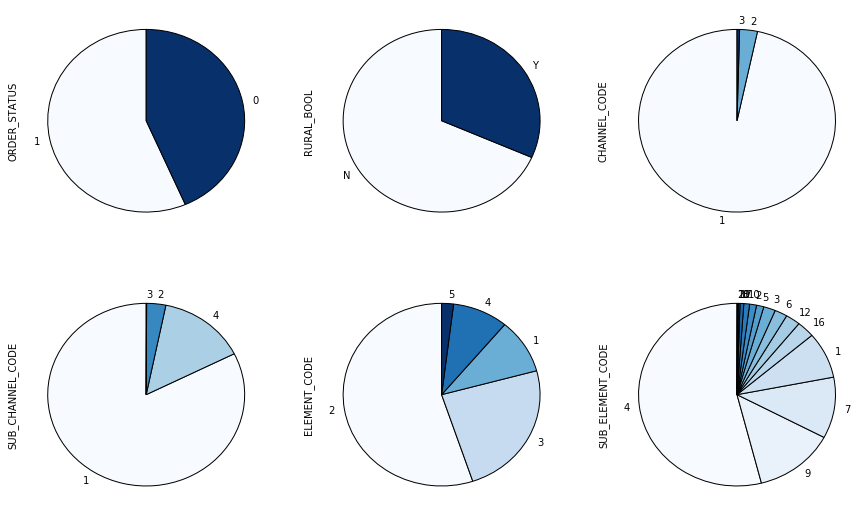

In [64]:
plt.figure(figsize=(15, 9))
cmap = cm.get_cmap('Blues')
pie_features = ['ORDER_STATUS', 'RURAL_BOOL', 'CHANNEL_CODE', 'SUB_CHANNEL_CODE', 'ELEMENT_CODE', 'SUB_ELEMENT_CODE']

for index, field in enumerate(pie_features):
    plt.subplot(2, 3, index+1)
    df[field].value_counts().plot(kind='pie', startangle=90, ax=plt.gca(), colormap = cmap)

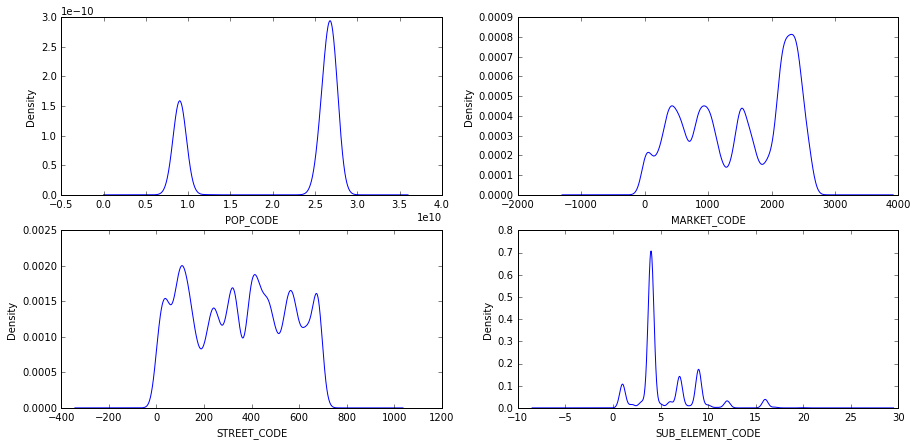

In [50]:
plt.figure(figsize=(15, 7))
density_features = ['POP_CODE', 'MARKET_CODE', 'STREET_CODE', 'SUB_ELEMENT_CODE']

for index, field in enumerate(density_features):
    plt.subplot(2, 2, index+1)
    df[field].plot(kind='density', ax=plt.gca())
    plt.xlabel(field)